In [45]:
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr, kendalltau

In [46]:
# matplotlib 한글 사용

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

csv파일 불러오기

In [47]:
bus_df = pd.read_csv("../Mook/transportation_bus.csv")
train_df = pd.read_csv("../Mook/transportation_train.csv")
weather_df = pd.read_csv("data/m_df.csv")

In [48]:
bus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1024 non-null   object 
 1   total_passenger     1024 non-null   float64
 2   commute_passenger   1024 non-null   float64
 3   other_passenger     1024 non-null   float64
 4   ID                  1024 non-null   int64  
 5   holiday_or_weekend  1024 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.1+ KB


In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1024 non-null   object 
 1   total_passenger     1024 non-null   float64
 2   commute_passenger   1024 non-null   float64
 3   other_passenger     1024 non-null   float64
 4   ID                  1024 non-null   int64  
 5   holiday_or_weekend  1024 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.1+ KB


In [50]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1399 non-null   int64  
 1   Date               1399 non-null   object 
 2   Fine_dust(㎍/㎥)     1399 non-null   float64
 3   Precipitation(mm)  1399 non-null   float64
 4   Snow_depth(cm)     1399 non-null   float64
 5   Day_type           1399 non-null   object 
 6   Season             1399 non-null   object 
 7   Year               1399 non-null   int64  
 8   FD_Grade           1399 non-null   object 
 9   P_Grade            1399 non-null   object 
 10  S_Grade            1399 non-null   object 
 11  Snow_depth(mm)     1399 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 131.3+ KB


데이터프레임 합치기

In [51]:
bus_df.columns=(["date", "bus_total", "bus_commute", "bus_other", "ID", "holiday_or_weekend"])
train_df.columns=(["date", "train_total", "train_commute", "train_other", "ID", "holiday_or_weekend"])

In [52]:
bus_df.head(3), train_df.head(3), bus_df.tail(3), train_df.tail(3)

(         date  bus_total  bus_commute  bus_other  ID  holiday_or_weekend
 0  2022-01-01  1858954.0     519623.0  1339331.0   1                   1
 1  2022-01-02  2048632.0     579340.0  1469292.0   2                   1
 2  2022-01-03  4028715.0    1793953.0  2234762.0   3                   0,
          date  train_total  train_commute  train_other  ID  holiday_or_weekend
 0  2022-01-01    1792725.0       502533.0    1290192.0   1                   1
 1  2022-01-02    2053208.0       608212.0    1444996.0   2                   1
 2  2022-01-03    4487668.0      2285899.0    2201769.0   3                   0,
             date  bus_total  bus_commute  bus_other    ID  holiday_or_weekend
 1021  2024-10-28  4900706.0    2052646.0  2848060.0  1032                   0
 1022  2024-10-29  5017336.0    2095851.0  2921485.0  1033                   0
 1023  2024-10-30  5092649.0    2111786.0  2980863.0  1034                   0,
             date  train_total  train_commute  train_other    ID 

In [53]:
bus_df.info(), train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1024 non-null   object 
 1   bus_total           1024 non-null   float64
 2   bus_commute         1024 non-null   float64
 3   bus_other           1024 non-null   float64
 4   ID                  1024 non-null   int64  
 5   holiday_or_weekend  1024 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1024 non-null   object 
 1   train_total         1024 non-null   float64
 2   train_commute       1024 non-null   float64
 3   train_other         1024 non-null   float64
 4   ID                  1024 non-null 

(None, None)

In [54]:
loc_bus_df = bus_df.iloc[:, 0:4]
loc_train_df = train_df
public_transport = pd.merge(loc_bus_df, loc_train_df, how="outer", on="date")
public_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1027 non-null   object 
 1   bus_total           1024 non-null   float64
 2   bus_commute         1024 non-null   float64
 3   bus_other           1024 non-null   float64
 4   train_total         1024 non-null   float64
 5   train_commute       1024 non-null   float64
 6   train_other         1024 non-null   float64
 7   ID                  1024 non-null   float64
 8   holiday_or_weekend  1024 non-null   float64
dtypes: float64(8), object(1)
memory usage: 72.3+ KB


In [59]:
public_transport = public_transport.drop(columns=["ID"])

In [60]:
weather_df = weather_df.loc[:, ["Date", "Fine_dust(㎍/㎥)", "Precipitation(mm)", "Snow_depth(mm)", "Day_type", "Season", "Year", "FD_Grade", "P_Grade", "S_Grade"]]
weather_df.columns = (["date", "fine_dust", "precipitation", "snow_depth", "day_type", "season", "year", "fd_grade", "p_grade", "s_grade"])
weather_df.info()

KeyError: "None of [Index(['Date', 'Fine_dust(㎍/㎥)', 'Precipitation(mm)', 'Snow_depth(mm)',\n       'Day_type', 'Season', 'Year', 'FD_Grade', 'P_Grade', 'S_Grade'],\n      dtype='object')] are in the [columns]"

In [ ]:
weather_df.head(), weather_df.tail()

(         date  fine_dust  precipitation  snow_depth day_type  season  year  \
 0  2021-01-01       36.0            0.0         0.0  Weekend  Winter  2021   
 1  2021-01-02       43.0            0.0         0.0  Weekend  Winter  2021   
 2  2021-01-03       47.0            0.0         0.0  Weekend  Winter  2021   
 3  2021-01-04       50.0            0.0         0.0  Weekday  Winter  2021   
 4  2021-01-05       37.0            0.0         0.0  Weekday  Winter  2021   
 
   fd_grade p_grade  s_grade  
 0   Normal     Dry  No_Snow  
 1   Normal     Dry  No_Snow  
 2   Normal     Dry  No_Snow  
 3   Normal     Dry  No_Snow  
 4   Normal     Dry  No_Snow  ,
             date  fine_dust  precipitation  snow_depth day_type season  year  \
 1394  2024-10-26  26.000000            0.0         0.0  Weekend   Fall  2024   
 1395  2024-10-27  27.000000            0.0         0.0  Weekend   Fall  2024   
 1396  2024-10-28  38.000000            0.0         0.0  Weekday   Fall  2024   
 1397  2024-1

In [61]:
merge_df = pd.merge(public_transport, weather_df, how="outer", on="date")
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1399 non-null   object 
 1   bus_total           1024 non-null   float64
 2   bus_commute         1024 non-null   float64
 3   bus_other           1024 non-null   float64
 4   train_total         1024 non-null   float64
 5   train_commute       1024 non-null   float64
 6   train_other         1024 non-null   float64
 7   holiday_or_weekend  1024 non-null   float64
 8   fine_dust           1399 non-null   float64
 9   precipitation       1399 non-null   float64
 10  snow_depth          1399 non-null   float64
 11  day_type            1399 non-null   object 
 12  season              1399 non-null   object 
 13  year                1399 non-null   int64  
 14  fd_grade            1399 non-null   object 
 15  p_grade             1399 non-null   object 
 16  s_grad

In [62]:
public_transport.head(), public_transport.tail()

(         date  bus_total  bus_commute  bus_other  train_total  train_commute  \
 0  2022-01-01  1858954.0     519623.0  1339331.0    1792725.0       502533.0   
 1  2022-01-02  2048632.0     579340.0  1469292.0    2053208.0       608212.0   
 2  2022-01-03  4028715.0    1793953.0  2234762.0    4487668.0      2285899.0   
 3  2022-01-04  4151012.0    1823826.0  2327186.0    4648008.0      2316071.0   
 4  2022-01-05  4151012.0    1823826.0  2327186.0    4648008.0      2316071.0   
 
    train_other  holiday_or_weekend  
 0    1290192.0                 1.0  
 1    1444996.0                 1.0  
 2    2201769.0                 0.0  
 3    2331937.0                 0.0  
 4    2331937.0                 0.0  ,
             date  bus_total  bus_commute  bus_other  train_total  \
 1022  2024-10-26  4026928.0    1194663.0  2832265.0    4561254.0   
 1023  2024-10-27  2991012.0     860873.0  2130139.0    3490702.0   
 1024  2024-10-28  4900706.0    2052646.0  2848060.0    5645227.0   
 1025  

결측치 해결하기

In [65]:
# 결측치 존재 확인
merge_df.isna().sum()

date                    0
bus_total             375
bus_commute           375
bus_other             375
train_total           375
train_commute         375
train_other           375
holiday_or_weekend    375
fine_dust               0
precipitation           0
snow_depth              0
day_type                0
season                  0
year                    0
fd_grade                0
p_grade                 0
s_grade                 0
dtype: int64

In [67]:
# 결측치 처리 ver1
# 결측치행 없애기

dropna_merge_df = merge_df.dropna(axis=0, how='any', subset=None, inplace=False)
dropna_merge_df.isna().sum()

date                  0
bus_total             0
bus_commute           0
bus_other             0
train_total           0
train_commute         0
train_other           0
holiday_or_weekend    0
fine_dust             0
precipitation         0
snow_depth            0
day_type              0
season                0
year                  0
fd_grade              0
p_grade               0
s_grade               0
dtype: int64

In [68]:
# 결측치 처리 ver2
# 날씨와 대중교통의 교집합이되지 못하는 행은 없애고, 교집합이면서 없는 행은 평균으로 채우기

# 교집합이 아닌 행 없애기
# loc_merge_df = merge_df.loc[365:, :]
# loc_merge_df.isna().sum()

In [69]:
# 교집합인 부분에 대해 평균으로 채우기 - 1

# 결측행 찾기
# loc_merge_df[loc_merge_df['train_other'].isna()]
# 628, 661, 711, 850, 1100, 1182, 1243, 1244, 1252, 1309

In [70]:
# 교집합인 부분에 대해 평균으로 채우기 - 2

# loc_merge_df["bus_total"] = loc_merge_df["bus_total"].fillna(loc_merge_df.bus_total.mean())
# loc_merge_df["bus_commute"] = loc_merge_df["bus_commute"].fillna(loc_merge_df.bus_commute.mean())
# loc_merge_df["bus_other"] = loc_merge_df["bus_other"].fillna(loc_merge_df.bus_other.mean())
# loc_merge_df["train_total"] = loc_merge_df["train_total"].fillna(loc_merge_df.train_total.mean())
# loc_merge_df["train_commute"] = loc_merge_df["train_commute"].fillna(loc_merge_df.train_commute.mean())
# loc_merge_df["train_other"] = loc_merge_df["train_other"].fillna(loc_merge_df.train_other.mean())

# # 결측치 유무 확인
# loc_merge_df[loc_merge_df['train_other'].isna()]

컬럼 자료형 변환

In [71]:
# date 컬럼을 datetime 형식으로 변환
dropna_merge_df['date'] = pd.to_datetime(dropna_merge_df['date'])
dropna_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1021 entries, 365 to 1398
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1021 non-null   datetime64[ns]
 1   bus_total           1021 non-null   float64       
 2   bus_commute         1021 non-null   float64       
 3   bus_other           1021 non-null   float64       
 4   train_total         1021 non-null   float64       
 5   train_commute       1021 non-null   float64       
 6   train_other         1021 non-null   float64       
 7   holiday_or_weekend  1021 non-null   float64       
 8   fine_dust           1021 non-null   float64       
 9   precipitation       1021 non-null   float64       
 10  snow_depth          1021 non-null   float64       
 11  day_type            1021 non-null   object        
 12  season              1021 non-null   object        
 13  year                1021 non-null   int64         


C:\Users\human\AppData\Local\Temp\ipykernel_2336\3532351103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropna_merge_df['date'] = pd.to_datetime(dropna_merge_df['date'])


In [72]:
# 승객수 컬럼들을 int로 변환 하려다 말음
# col = ['bus_total', 'bus_commute', 'bus_other', 'train_total', 'train_commute', 'train_other']
# loc_merge_df[col] = loc_merge_df[col].astype(int)

# 민맥스스케일링을 위해 자료형을 실수로 그대로 둠

필요 컬럼만 자르기

In [74]:
dropna_merge_df["total"] = dropna_merge_df["bus_total"] + dropna_merge_df["train_total"]
dropna_merge_df["total_commute"] = dropna_merge_df["bus_commute"] + dropna_merge_df["train_commute"]
dropna_merge_df["total_other"] = dropna_merge_df["bus_other"] + dropna_merge_df["train_other"]
dropna_merge_df.columns

C:\Users\human\AppData\Local\Temp\ipykernel_2336\3351692074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropna_merge_df["total"] = dropna_merge_df["bus_total"] + dropna_merge_df["train_total"]
C:\Users\human\AppData\Local\Temp\ipykernel_2336\3351692074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropna_merge_df["total_commute"] = dropna_merge_df["bus_commute"] + dropna_merge_df["train_commute"]
C:\Users\human\AppData\Local\Temp\ipykernel_2336\3351692074.py:3: SettingWithCopyWarning: 
A value

Index(['date', 'bus_total', 'bus_commute', 'bus_other', 'train_total',
       'train_commute', 'train_other', 'holiday_or_weekend', 'fine_dust',
       'precipitation', 'snow_depth', 'day_type', 'season', 'year', 'fd_grade',
       'p_grade', 's_grade', 'total', 'total_commute', 'total_other'],
      dtype='object')

In [78]:
passenger_and_weather = dropna_merge_df.loc[:,['date', 'total', 'total_commute', 'total_other', 
                                               'fine_dust', 'precipitation','snow_depth', 
                                               'fd_grade', 'p_grade', 's_grade', 
                                               'year', 'season', 'holiday_or_weekend']]
passenger_and_weather.info(), passenger_and_weather.head(5)
# 평일 = 0, 주말+공휴일 = 1

<class 'pandas.core.frame.DataFrame'>
Index: 1021 entries, 365 to 1398
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1021 non-null   datetime64[ns]
 1   total               1021 non-null   float64       
 2   total_commute       1021 non-null   float64       
 3   total_other         1021 non-null   float64       
 4   fine_dust           1021 non-null   float64       
 5   precipitation       1021 non-null   float64       
 6   snow_depth          1021 non-null   float64       
 7   fd_grade            1021 non-null   object        
 8   p_grade             1021 non-null   object        
 9   s_grade             1021 non-null   object        
 10  year                1021 non-null   int64         
 11  season              1021 non-null   object        
 12  holiday_or_weekend  1021 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(

(None,
           date      total  total_commute  total_other  fine_dust  \
 365 2022-01-01  3651679.0      1022156.0    2629523.0       34.0   
 366 2022-01-02  4101840.0      1187552.0    2914288.0       42.0   
 367 2022-01-03  8516383.0      4079852.0    4436531.0       28.0   
 368 2022-01-04  8799020.0      4139897.0    4659123.0       37.0   
 369 2022-01-05  8799020.0      4139897.0    4659123.0       52.0   
 
      precipitation  snow_depth fd_grade p_grade     s_grade  year  season  \
 365            0.0         0.0   Normal     Dry     No_Snow  2022  Winter   
 366            0.3         5.0   Normal   Light  Light_Snow  2022  Winter   
 367            0.0         0.0     Good     Dry     No_Snow  2022  Winter   
 368            0.0         0.0   Normal     Dry     No_Snow  2022  Winter   
 369            0.0         0.0   Normal     Dry     No_Snow  2022  Winter   
 
      holiday_or_weekend  
 365                 1.0  
 366                 1.0  
 367                 0.0  

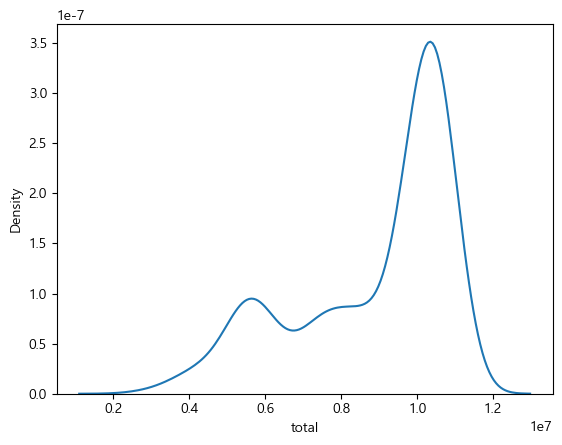

In [79]:
# 정규성 검정 - 승객 수
sns.kdeplot(data=passenger_and_weather["total"])
plt.show()


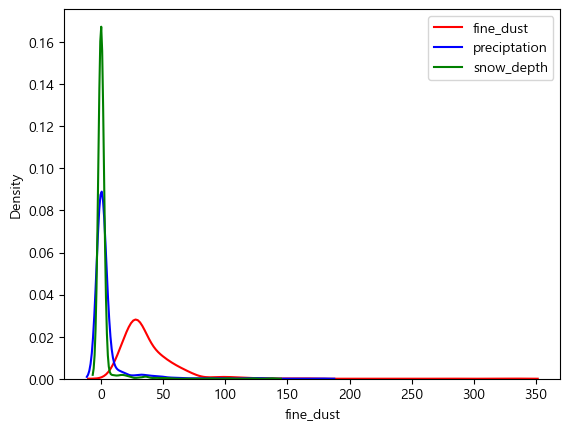

In [80]:
# 정규성 검정 - 미세먼지, 강수량, 적설량
sns.kdeplot(data=passenger_and_weather["fine_dust"], color='red', label="fine_dust")
sns.kdeplot(data=passenger_and_weather["precipitation"], color='blue', label="preciptation")
sns.kdeplot(data=passenger_and_weather["snow_depth"], color='green', label="snow_depth")
plt.legend()
plt.show()

그래프상 승객 수, 미세먼지, 강수량, 적설량 정규분포한다고 보기 어렵다고 판단

In [81]:
passenger_and_weather.columns

Index(['date', 'total', 'total_commute', 'total_other', 'fine_dust',
       'precipitation', 'snow_depth', 'fd_grade', 'p_grade', 's_grade', 'year',
       'season', 'holiday_or_weekend'],
      dtype='object')

In [85]:
# 평일 데이터 프레임
weekday_data = passenger_and_weather[passenger_and_weather['holiday_or_weekend'] == 0]
# 주말+공휴일 데이터 프레임
holiday_data = passenger_and_weather[passenger_and_weather['holiday_or_weekend'] == 1]

In [109]:
# 스피어만 상관계수
holiday_corr_spearman = holiday_data[['total', 'fine_dust']].corr(method='spearman')

# 켄달 상관계수
holiday_corr_kendall = holiday_data[['total', 'fine_dust']].corr(method='kendall')

In [90]:
# 전체 승객과 미세먼지의 상관관계
print( pearsonr( passenger_and_weather["total"], passenger_and_weather["fine_dust"] ) )
print( spearmanr( passenger_and_weather["total"], passenger_and_weather["fine_dust"] ) )
print( kendalltau( passenger_and_weather["total"], passenger_and_weather["fine_dust"] ), '\n' )

# 평일 승객과 미세먼지의 상관관계
print( pearsonr( weekday_data["total"], weekday_data["fine_dust"] ) )
print( spearmanr( weekday_data["total"], weekday_data["fine_dust"] ) )
print( kendalltau( weekday_data["total"], weekday_data["fine_dust"] ), '\n' )

# 주말 승객과 미세먼지의 상관관계
print( pearsonr( holiday_data["total"], holiday_data["fine_dust"] ) )
print( spearmanr( holiday_data["total"], holiday_data["fine_dust"] ) )
print( kendalltau( holiday_data["total"], holiday_data["fine_dust"] ), '\n' )

PearsonRResult(statistic=np.float64(0.012168865033632823), pvalue=np.float64(0.6977415655108078))
SignificanceResult(statistic=np.float64(0.017391425537725526), pvalue=np.float64(0.5788460691274285))
SignificanceResult(statistic=np.float64(0.011986558560414412), pvalue=np.float64(0.5698351252935028)) 

PearsonRResult(statistic=np.float64(-0.003237290977948254), pvalue=np.float64(0.9324528594229236))
SignificanceResult(statistic=np.float64(-0.008844436831097625), pvalue=np.float64(0.8168719400773664))
SignificanceResult(statistic=np.float64(-0.005945278225395538), pvalue=np.float64(0.8171459462642585)) 

PearsonRResult(statistic=np.float64(-0.014189963566179364), pvalue=np.float64(0.7964209252703804))
SignificanceResult(statistic=np.float64(0.04167779560783657), pvalue=np.float64(0.4484402246582384))
SignificanceResult(statistic=np.float64(0.030296607391578807), pvalue=np.float64(0.41365214300188524)) 



C:\Users\human\AppData\Local\Temp\ipykernel_2336\2244480861.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


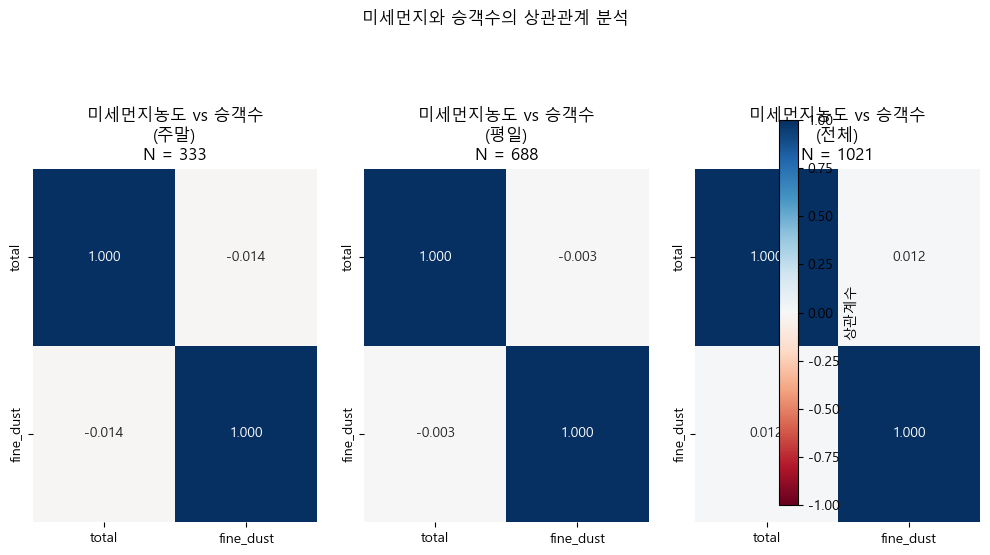

In [119]:
# 미세먼지와 승객의 상관관계 분석

def create_fine_dust_passenger_correlation(total_data, weekday_data, holiday_data):
    fine_dust_total = total_data
    fine_dust_weekday = weekday_data
    fine_dust_holiday = holiday_data
    
    # 그리드 설정
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    
    # 데이터셋 딕셔너리
    datasets = {
        '주말': fine_dust_holiday,
        '평일': fine_dust_weekday,
        '전체': fine_dust_total
    }
    
    # 각 데이터셋에 대해 히트맵 그리기
    for i, (data_name, data) in enumerate(datasets.items()):
        # 상관계수 행렬 계산
        corr = data[['total', 'fine_dust']].corr()
        
        # 히트맵 그리기
        sns.heatmap(corr, 
                   annot=True,
                   fmt='.3f',
                   cmap='RdBu',
                   vmin=-1, 
                   vmax=1,
                   center=0,
                   ax=axes[i],
                   cbar=False)
        
        # 제목 설정 (데이터 수 포함)
        axes[i].set_title(f'미세먼지농도 vs 승객수\n({data_name})\nN = {len(data)}')
    
    # 전체 타이틀
    plt.suptitle('미세먼지와 승객수의 상관관계 분석', fontsize=12, y=1.1)
    
    # 컬러바 추가
    fig.colorbar(axes[0].collections[0], ax=axes, location='right', label='상관계수')
    
    plt.tight_layout()
    return fig

# 히트맵 그리기
fig = create_fine_dust_passenger_correlation(
    total_data=passenger_and_weather,
    weekday_data=weekday_data,
    holiday_data=holiday_data
)

# 상세 상관계수 출력
datasets = {
    '전체': passenger_and_weather[passenger_and_weather['fine_dust'] > 0],
    '평일': weekday_data[weekday_data['fine_dust'] > 0],
    '주말': holiday_data[holiday_data['fine_dust'] > 0]
}


In [107]:
# # 전체 승객과 강수량의 상관관계
# print( pearsonr( passenger_and_weather["total"], passenger_and_weather["precipitation"] ) )
# print( spearmanr( passenger_and_weather["total"], passenger_and_weather["precipitation"] ) )
# print( kendalltau( passenger_and_weather["total"], passenger_and_weather["precipitation"] ), '\n' )

# # 평일 승객과 강수량의 상관관계
# print( pearsonr( weekday_data["total"], weekday_data["precipitation"] ) )
# print( spearmanr( weekday_data["total"], weekday_data["precipitation"] ) )
# print( kendalltau( weekday_data["total"], weekday_data["precipitation"] ), '\n' )

# # 주말 승객과 강수량의 상관관계
# print( pearsonr( holiday_data["total"], holiday_data["precipitation"] ) )
# print( spearmanr( holiday_data["total"], holiday_data["precipitation"] ) )
# print( kendalltau( holiday_data["total"], holiday_data["precipitation"] ), '\n' )

In [ ]:
# 강수량이 0이 아닌 날의 데이터만 추출
rainy_data = passenger_and_weather[passenger_and_weather['precipitation'] > 0]

# 평일 중 강수일 데이터
rainy_weekday = weekday_data[weekday_data['precipitation'] > 0]

# 주말/휴일 중 강수일 데이터
rainy_holiday = holiday_data[holiday_data['precipitation'] > 0]

# 강수일의 승객수와 강수량의 상관관계 분석
print("강수일의 승객수와 강수량 상관관계:")
print("Pearson:", pearsonr(rainy_data["total"], rainy_data["precipitation"]))
print("Spearman:", spearmanr(rainy_data["total"], rainy_data["precipitation"]))
print("Kendall:", kendalltau(rainy_data["total"], rainy_data["precipitation"]))

# 참고로 데이터 수도 확인해보면 좋습니다
print("\n전체 데이터 수:", len(passenger_and_weather))
print("강수일 데이터 수:", len(rainy_data))

print("\n평일 강수일의 승객수와 강수량 상관관계:")
print("Pearson:", pearsonr(rainy_weekday["total"], rainy_weekday["precipitation"]))
print("Spearman:", spearmanr(rainy_weekday["total"], rainy_weekday["precipitation"]))
print("Kendall:", kendalltau(rainy_weekday["total"], rainy_weekday["precipitation"]))

print("\n주말/휴일 강수일의 승객수와 강수량 상관관계:")
print("Pearson:", pearsonr(rainy_holiday["total"], rainy_holiday["precipitation"]))
print("Spearman:", spearmanr(rainy_holiday["total"], rainy_holiday["precipitation"]))
print("Kendall:", kendalltau(rainy_holiday["total"], rainy_holiday["precipitation"]))

print("\n평일 강수일 데이터 수:", len(rainy_weekday))
print("주말/휴일 강수일 데이터 수:", len(rainy_holiday))


강수일의 승객수와 강수량 상관관계:
Pearson: PearsonRResult(statistic=np.float64(-0.011001088786863737), pvalue=np.float64(0.8477624534438581))
Spearman: SignificanceResult(statistic=np.float64(-0.11577509152908441), pvalue=np.float64(0.04265323576636679))
Kendall: SignificanceResult(statistic=np.float64(-0.0780279086005949), pvalue=np.float64(0.042464365228127375))

전체 데이터 수: 1021
강수일 데이터 수: 307

평일 강수일의 승객수와 강수량 상관관계:
Pearson: PearsonRResult(statistic=np.float64(-0.20437513741367372), pvalue=np.float64(0.003527944591493488))
Spearman: SignificanceResult(statistic=np.float64(-0.21825330518253622), pvalue=np.float64(0.0018059485645047463))
Kendall: SignificanceResult(statistic=np.float64(-0.1523059051338188), pvalue=np.float64(0.0013545813946968831))

주말/휴일 강수일의 승객수와 강수량 상관관계:
Pearson: PearsonRResult(statistic=np.float64(-0.09788495685281882), pvalue=np.float64(0.32051323926531505))
Spearman: SignificanceResult(statistic=np.float64(-0.06351305433512532), pvalue=np.float64(0.5197862589025302))
Kendall:

C:\Users\human\AppData\Local\Temp\ipykernel_2336\1062901762.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



강수일 데이터 분석 결과:

전체 (데이터 수: 307):
Pearson: -0.011
Spearman: -0.116
Kendall: -0.078

평일 (데이터 수: 202):
Pearson: -0.204
Spearman: -0.218
Kendall: -0.152

주말 (데이터 수: 105):
Pearson: -0.098
Spearman: -0.064
Kendall: -0.040


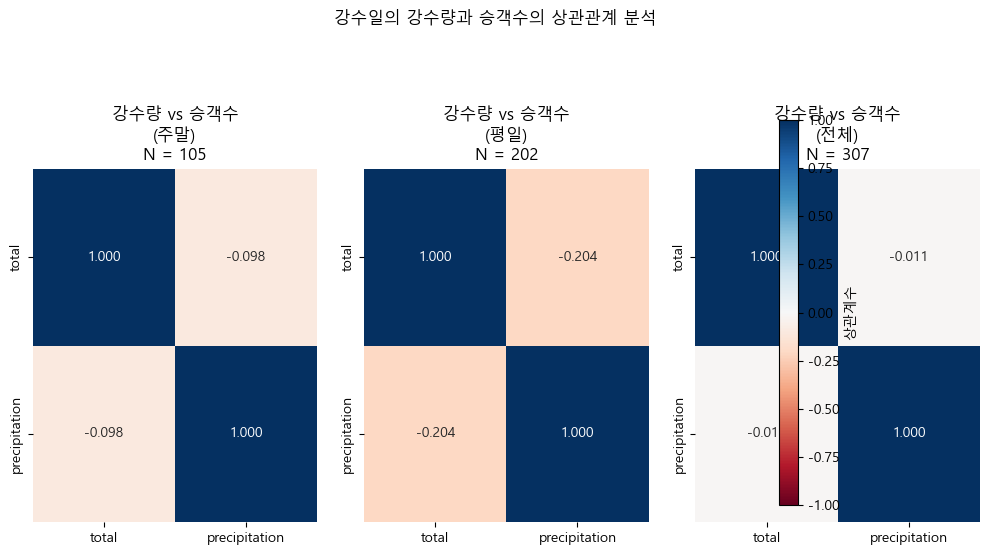

In [114]:
# 강수량과 승객의 상관관계 분석

def create_rain_passenger_correlation(total_data, weekday_data, holiday_data):
    # 강수일 데이터만 필터링
    rainy_total = total_data[total_data['precipitation'] > 0]
    rainy_weekday = weekday_data[weekday_data['precipitation'] > 0]
    rainy_holiday = holiday_data[holiday_data['precipitation'] > 0]
    
    # 그리드 설정
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    
    # 데이터셋 딕셔너리
    datasets = {
        '주말': rainy_holiday,
        '평일': rainy_weekday,
        '전체': rainy_total
    }
    
    # 각 데이터셋에 대해 히트맵 그리기
    for i, (data_name, data) in enumerate(datasets.items()):
        # 상관계수 행렬 계산
        corr = data[['total', 'precipitation']].corr()
        
        # 히트맵 그리기
        sns.heatmap(corr, 
                   annot=True,
                   fmt='.3f',
                   cmap='RdBu',
                   vmin=-1, 
                   vmax=1,
                   center=0,
                   ax=axes[i],
                   cbar=False)
        
        # 제목 설정 (데이터 수 포함)
        axes[i].set_title(f'강수량 vs 승객수\n({data_name})\nN = {len(data)}')
    
    # 전체 타이틀
    plt.suptitle('강수일의 강수량과 승객수의 상관관계 분석', fontsize=12, y=1.1)
    
    # 컬러바 추가
    fig.colorbar(axes[0].collections[0], ax=axes, location='right', label='상관계수')
    
    plt.tight_layout()
    return fig

# 히트맵 그리기
fig = create_rain_passenger_correlation(
    total_data=passenger_and_weather,
    weekday_data=weekday_data,
    holiday_data=holiday_data
)

# 상세 상관계수 출력
datasets = {
    '전체': passenger_and_weather[passenger_and_weather['precipitation'] > 0],
    '평일': weekday_data[weekday_data['precipitation'] > 0],
    '주말': holiday_data[holiday_data['precipitation'] > 0]
}

print("\n강수일 데이터 분석 결과:")
for name, data in datasets.items():
    print(f"\n{name} (데이터 수: {len(data)}):")
    print(f"Pearson: {data[['total', 'precipitation']].corr().iloc[0,1]:.3f}")
    print(f"Spearman: {data[['total', 'precipitation']].corr(method='spearman').iloc[0,1]:.3f}")
    print(f"Kendall: {data[['total', 'precipitation']].corr(method='kendall').iloc[0,1]:.3f}")

In [116]:
# 적설량이 0이 아닌 날의 데이터만 추출
snowy_data = passenger_and_weather[passenger_and_weather['snow_depth'] > 0]

# 평일 중 적설일 데이터
snowy_weekday = weekday_data[weekday_data['snow_depth'] > 0]

# 주말/휴일 중 적설일 데이터
snowy_holiday = holiday_data[holiday_data['snow_depth'] > 0]

# 적설일의 승객수와 강수량의 상관관계 분석
print("적설일의 승객수와 강수량 상관관계:")
print("Pearson:", pearsonr(snowy_data["total"], snowy_data["snow_depth"]))
print("Spearman:", spearmanr(snowy_data["total"], snowy_data["snow_depth"]))
print("Kendall:", kendalltau(snowy_data["total"], snowy_data["snow_depth"]))

# 참고로 데이터 수도 확인해보면 좋습니다
print("\n전체 데이터 수:", len(passenger_and_weather))
print("적설일 데이터 수:", len(snowy_data))

print("\n평일 적설일의 승객수와 강수량 상관관계:")
print("Pearson:", pearsonr(snowy_weekday["total"], snowy_weekday["snow_depth"]))
print("Spearman:", spearmanr(snowy_weekday["total"], snowy_weekday["snow_depth"]))
print("Kendall:", kendalltau(snowy_weekday["total"], snowy_weekday["snow_depth"]))

print("\n주말/휴일 적설일의 승객수와 강수량 상관관계:")
print("Pearson:", pearsonr(snowy_holiday["total"], snowy_holiday["snow_depth"]))
print("Spearman:", spearmanr(snowy_holiday["total"], snowy_holiday["snow_depth"]))
print("Kendall:", kendalltau(snowy_holiday["total"], snowy_holiday["snow_depth"]))

print("\n평일 적설일 데이터 수:", len(snowy_weekday))
print("주말/휴일 적설일 데이터 수:", len(snowy_holiday))


적설일의 승객수와 강수량 상관관계:
Pearson: PearsonRResult(statistic=np.float64(0.07399849242117605), pvalue=np.float64(0.5643621464474613))
Spearman: SignificanceResult(statistic=np.float64(0.1819405006603747), pvalue=np.float64(0.1535418532087424))
Kendall: SignificanceResult(statistic=np.float64(0.1366175633518548), pvalue=np.float64(0.11705187502760475))

전체 데이터 수: 1021
적설일 데이터 수: 63

평일 적설일의 승객수와 강수량 상관관계:
Pearson: PearsonRResult(statistic=np.float64(0.3000780379329574), pvalue=np.float64(0.059931994488181664))
Spearman: SignificanceResult(statistic=np.float64(0.3727939466693477), pvalue=np.float64(0.017831427119790084))
Kendall: SignificanceResult(statistic=np.float64(0.26391767782931375), pvalue=np.float64(0.01734609296303249))

주말/휴일 적설일의 승객수와 강수량 상관관계:
Pearson: PearsonRResult(statistic=np.float64(0.028749474291114033), pvalue=np.float64(0.8963962203575655))
Spearman: SignificanceResult(statistic=np.float64(0.009891201673385095), pvalue=np.float64(0.964273044883843))
Kendall: SignificanceResu

C:\Users\human\AppData\Local\Temp\ipykernel_2336\700285059.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



적설일 데이터 분석 결과:

전체 (데이터 수: 63):
Pearson: 0.074
Spearman: 0.182
Kendall: 0.137

평일 (데이터 수: 40):
Pearson: 0.300
Spearman: 0.373
Kendall: 0.264

주말 (데이터 수: 23):
Pearson: 0.029
Spearman: 0.010
Kendall: 0.020


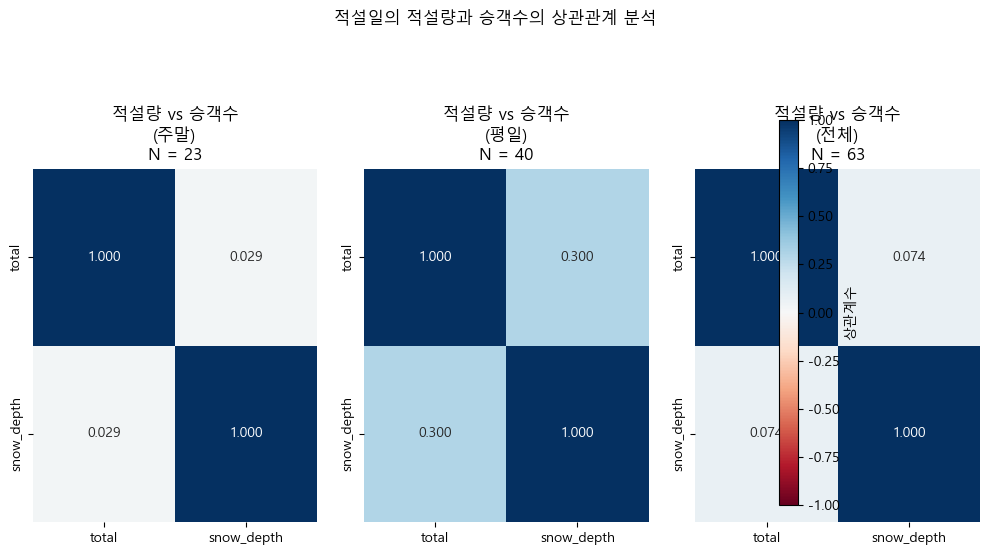

In [117]:
# 적설량과 승객의 상관관계 분석

def create_snow_passenger_correlation(total_data, weekday_data, holiday_data):
    # 적설일 데이터만 필터링
    snowy_total = total_data[total_data['snow_depth'] > 0]
    snowy_weekday = weekday_data[weekday_data['snow_depth'] > 0]
    snowy_holiday = holiday_data[holiday_data['snow_depth'] > 0]
    
    # 그리드 설정
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    
    # 데이터셋 딕셔너리
    datasets = {
        '주말': snowy_holiday,
        '평일': snowy_weekday,
        '전체': snowy_total
    }
    
    # 각 데이터셋에 대해 히트맵 그리기
    for i, (data_name, data) in enumerate(datasets.items()):
        # 상관계수 행렬 계산
        corr = data[['total', 'snow_depth']].corr()
        
        # 히트맵 그리기
        sns.heatmap(corr, 
                   annot=True,
                   fmt='.3f',
                   cmap='RdBu',
                   vmin=-1, 
                   vmax=1,
                   center=0,
                   ax=axes[i],
                   cbar=False)
        
        # 제목 설정 (데이터 수 포함)
        axes[i].set_title(f'적설량 vs 승객수\n({data_name})\nN = {len(data)}')
    
    # 전체 타이틀
    plt.suptitle('적설일의 적설량과 승객수의 상관관계 분석', fontsize=12, y=1.1)
    
    # 컬러바 추가
    fig.colorbar(axes[0].collections[0], ax=axes, location='right', label='상관계수')
    
    plt.tight_layout()
    return fig

# 히트맵 그리기
fig = create_snow_passenger_correlation(
    total_data=passenger_and_weather,
    weekday_data=weekday_data,
    holiday_data=holiday_data
)

# 상세 상관계수 출력
datasets = {
    '전체': passenger_and_weather[passenger_and_weather['snow_depth'] > 0],
    '평일': weekday_data[weekday_data['snow_depth'] > 0],
    '주말': holiday_data[holiday_data['snow_depth'] > 0]
}

print("\n적설일 데이터 분석 결과:")
for name, data in datasets.items():
    print(f"\n{name} (데이터 수: {len(data)}):")
    print(f"Pearson: {data[['total', 'snow_depth']].corr().iloc[0,1]:.3f}")
    print(f"Spearman: {data[['total', 'snow_depth']].corr(method='spearman').iloc[0,1]:.3f}")
    print(f"Kendall: {data[['total', 'snow_depth']].corr(method='kendall').iloc[0,1]:.3f}")

C:\Users\human\AppData\Local\Temp\ipykernel_2336\3433568525.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



상관계수 요약:

fine_dust와의 상관계수:
전체: 0.012
평일: -0.003
주말: -0.014

precipitation와의 상관계수:
전체: -0.026
평일: -0.138
주말: -0.070

snow_depth와의 상관계수:
전체: -0.029
평일: -0.006
주말: -0.058


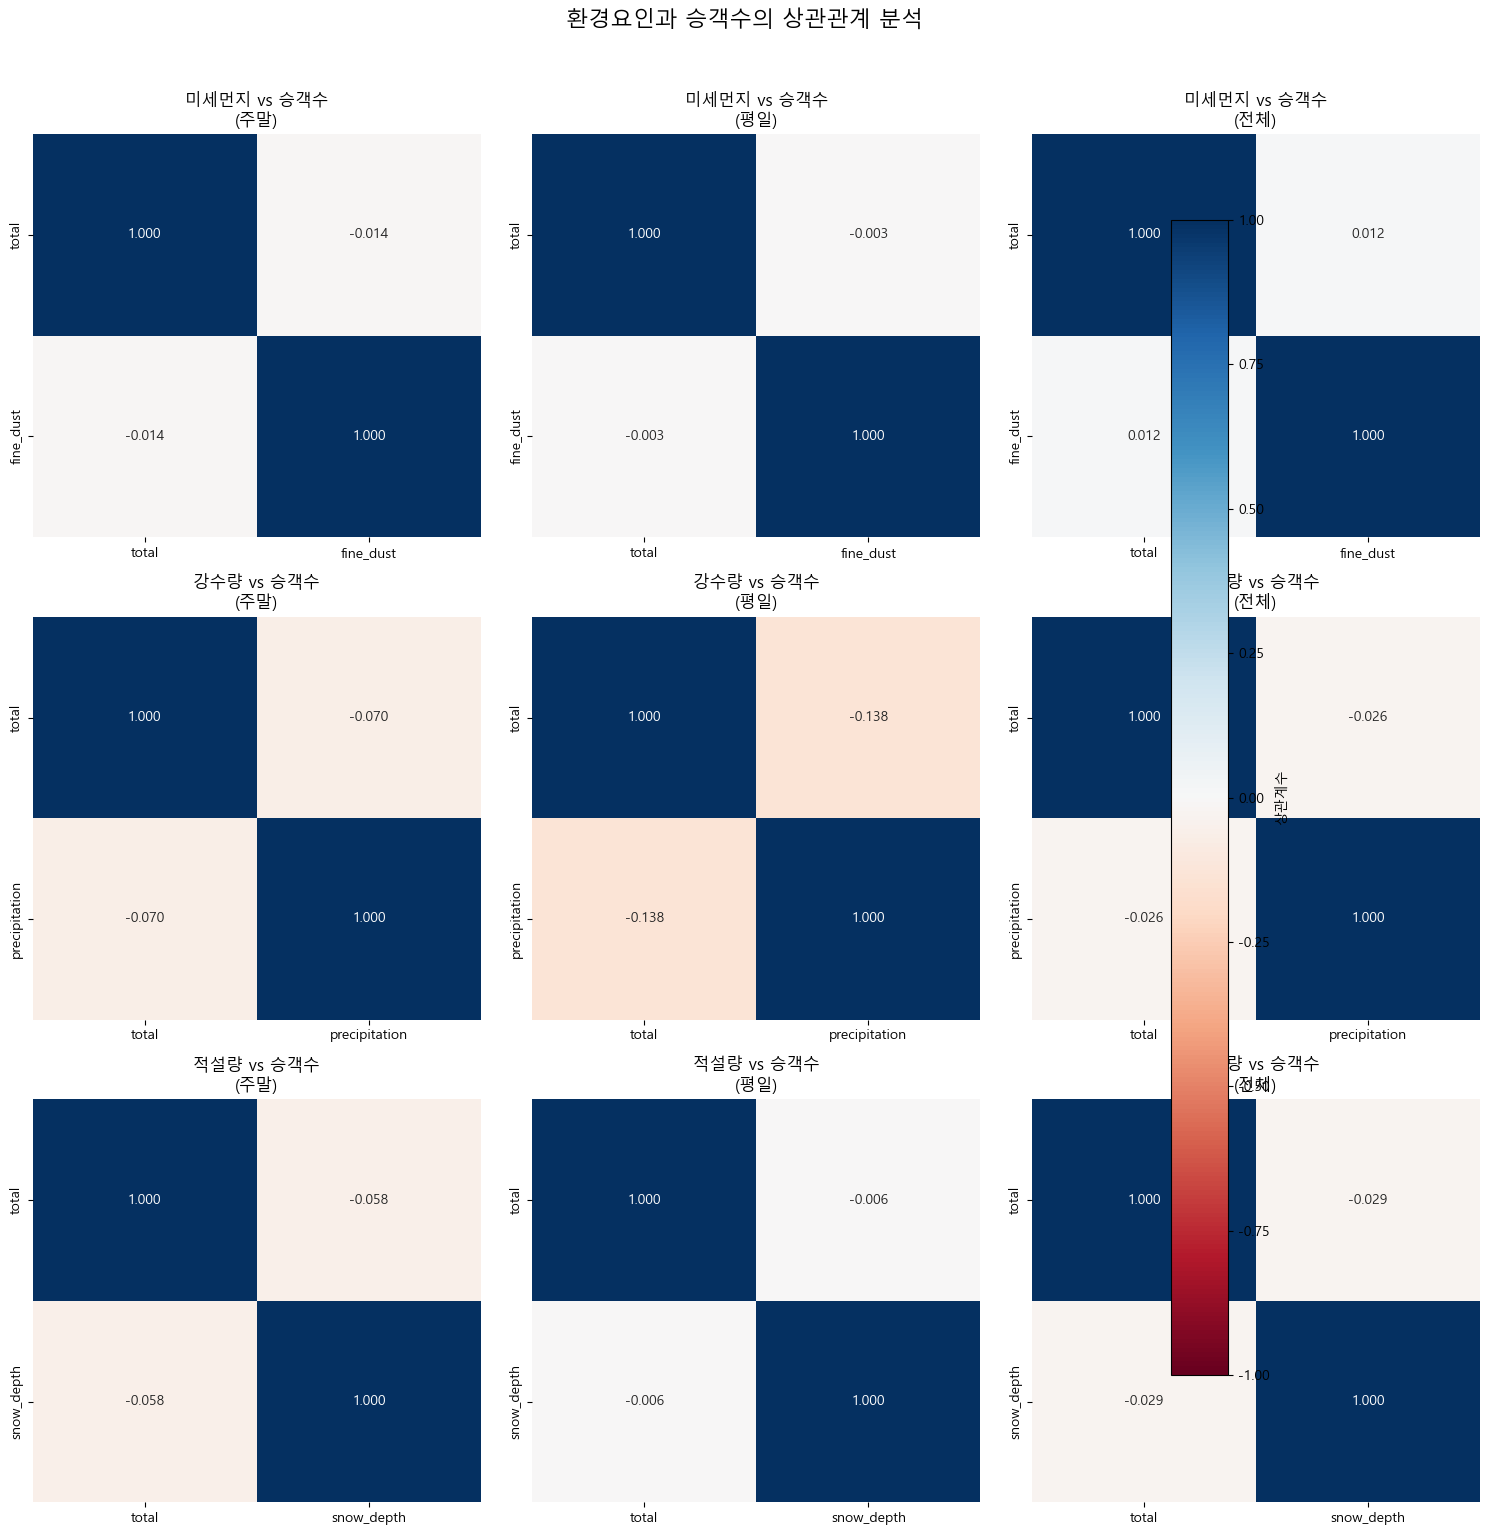

In [120]:


def create_correlation_grid(total_data, weekday_data, holiday_data):
    # 그리드 설정
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    
    # 분석할 환경변수들
    env_vars = ['fine_dust', 'precipitation', 'snow_depth']
    titles = ['미세먼지', '강수량', '적설량']
    
    # 데이터셋 딕셔너리
    datasets = {
        '주말': holiday_data,
        '평일': weekday_data,
        '전체': total_data
    }
    
    # 각 행(환경변수)에 대해
    for i, (env_var, title) in enumerate(zip(env_vars, titles)):
        # 각 열(데이터셋)에 대해
        for j, (data_name, data) in enumerate(datasets.items()):
            # 상관계수 행렬 계산
            corr = data[['total', env_var]].corr()
            
            # 히트맵 그리기
            sns.heatmap(corr, 
                       annot=True,
                       fmt='.3f',
                       cmap='RdBu',
                       vmin=-1, 
                       vmax=1,
                       center=0,
                       ax=axes[i][j],
                       cbar=False)  # 각각의 컬러바는 생략
            
            # 제목 설정
            axes[i][j].set_title(f'{title} vs 승객수\n({data_name})')
    
    # 전체 타이틀
    plt.suptitle('환경요인과 승객수의 상관관계 분석', fontsize=16, y=1.02)
    
    # 컬러바 추가 (하나로 통일)
    fig.colorbar(axes[0][0].collections[0], ax=axes, location='right', label='상관계수')
    
    plt.tight_layout()
    return fig

# 히트맵 그리기
fig = create_correlation_grid(
    total_data=passenger_and_weather,
    weekday_data=weekday_data,
    holiday_data=holiday_data
)

# 각 상관계수 출력
env_vars = ['fine_dust', 'precipitation', 'snow_depth']
datasets = {
    '전체': passenger_and_weather,
    '평일': weekday_data,
    '주말': holiday_data
}

print("\n상관계수 요약:")
for env_var in env_vars:
    print(f"\n{env_var}와의 상관계수:")
    for name, data in datasets.items():
        corr = data[['total', env_var]].corr().iloc[0,1]
        print(f"{name}: {corr:.3f}")

In [ ]:
# # 강수량이 약강수 이상 데이터만 필터링
# light_rain_df = scaled_df[scaled_df['precipitation'] >= 10]

# # 그룹화된 산점도 그리기
# plt.figure(figsize=(5, 3))

# # holiday_or_weekend가 0인 경우
# plt.scatter(light_rain_df[light_rain_df['holiday_or_weekend'] == 0]['total'],
#             light_rain_df[light_rain_df['holiday_or_weekend'] == 0]['precipitation'],
#             alpha=0.2, color='b', label='Weekday')

# # holiday_or_weekend가 1인 경우
# plt.scatter(light_rain_df[light_rain_df['holiday_or_weekend'] == 1]['total'],
#             light_rain_df[light_rain_df['holiday_or_weekend'] == 1]['precipitation'],
#             alpha=0.2, color='r', label='Holiday/Weekend')

# plt.title('Relationship between Total and Precipitation (Weekday vs. Holiday/Weekend, Light Precipitation)')
# plt.xlabel('Total')
# plt.ylabel('Precipitation (mm)')
# plt.legend()
# plt.show()
